## Introduction: Understanding The King County House Sales Market

The housing market is a crucial component of the economy that influences investment decisions. Accurate prediction of house prices can benefit various stakeholders, including buyers, sellers, investors, and policymakers. The King County House Sales dataset provides a rich source of information to explore the factors influencing house prices.

This project aims to provide a comprehensive analysis of King County House sales market, focusing on key factors that influence housing prices. By leveraging statistical techniques, particularly linear and multiple linear regression models, we aim to to analyze and predict house prices in King County and uncover insights that will empower stakeholders to make informed decisions.

## Problem Statement

In the dynamic real estate market of King County, accurately predicting house prices is a complex yet essential task. Real estate agents, buyers, and sellers need reliable models to make informed decisions. The aim is to develop a robust model that can predict house prices based on various property features, ensuring higher accuracy and reliability in a competitive market.

## Objectives

1. **Explore the Relationship Between Property Size and Housing Prices:**
 - Investigate how the square footage (sgft_living) of the home correlates with price of the home (price). Determine if larger properties command higher prices, aiding real estate investors in valuation strategies.
 

2. **Develop a Simple Linear Regression Model:**
 - Build and evaluate a simple linear regression model using the most correlated feature with house prices and evaluate its performance.


3. **Develop a Multiple Linear Regression Model:**
  - Build and evaluate two multiple linear regression model incorporating various significant features and assess its performance compared to the simple linear regression model.

## Imports

In [1]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

## Data Loading

In [2]:
df = pd.read_csv("./data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## Data Checks

In [3]:
# Previewing the top of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Previewing the bottom of the dataset
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
# Checking if columns are named appropriately
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Kings County Dataset Column Description
 - **id** - unique identified for a house
 - **date** - Date house was sold
 - **price** - Price is prediction target
 - **bedrooms** - Number of Bedrooms/House
 - **bathrooms** - Number of bathrooms/bedrooms
 - **sqft_living** - square footage of the home
 - **sqft_lot** - square footage of the lot
 - **floors** - Total floors (levels) in house
 - **waterfront** - House which has a view to a waterfront
 - **view** - Has been viewed
 - **condition** - How good the condition is ( Overall )
 - **grade** - overall grade given to the housing unit, based on King County grading system
 - **sqft_above** - square footage of house apart from basement
 - **sqft_basement** - square footage of the basement
 - **yr_built** - Built Year
 - **yr_renovated** - Year when house was renovated
 - **zipcode** - zip
 - **lat** - Latitude coordinate
 - **long** - Longitude coordinate
 - **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
 - **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Exploratory Data Analysis (EDA)

In [6]:
# Checking the shape of the data
df.shape

(21597, 21)

 - **Number of Rows (Observations)**: There are 21597 rows in the DataFrame.
 - **Number of Columns (Variables)**: There are 21 columns (or variables) in the DataFrame.

Checking on the data types

In [7]:
# Checking on the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Checking data description of numerical columns

In [8]:
# Checking the structure of the dataset to identify anomalies
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Cleaning

Dropping the following features befor checking for null values:
 - **date**
 - **view**
 - **sqft_above**
 - **sqft_basement**
 - **yr_renovated**
 - **zipcode**
 - **lat**
 - **long**
 - **sqft_living15**
 - **sqft_lot15**

In [9]:
# Drop specified columns
columns_to_drop = [
    'id', 'date', 'view', 'sqft_above', 'sqft_basement', 
    'yr_renovated', 'zipcode', 'lat', 'long', 
    'sqft_living15', 'sqft_lot15'
]
df = df.drop(columns=columns_to_drop)

Checking if the column drop was successful

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


Checking for null values

In [11]:
df.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

The output indicates the count of missing values (NaN or null values) for each column in the King County House Sales dataset:

    waterfront: 2376 mising values.
    id, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, grade, yr_built: No missing values.

In [12]:
# fill null values with mean
df['waterfront'].fillna((df['waterfront'].mean), inplace=True)
# other options = mode , median

Rechecking for null values

In [13]:
# check for missing values after clean-up
df.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

## Pair Plot

Pair plotting to show how different columns affect one another.

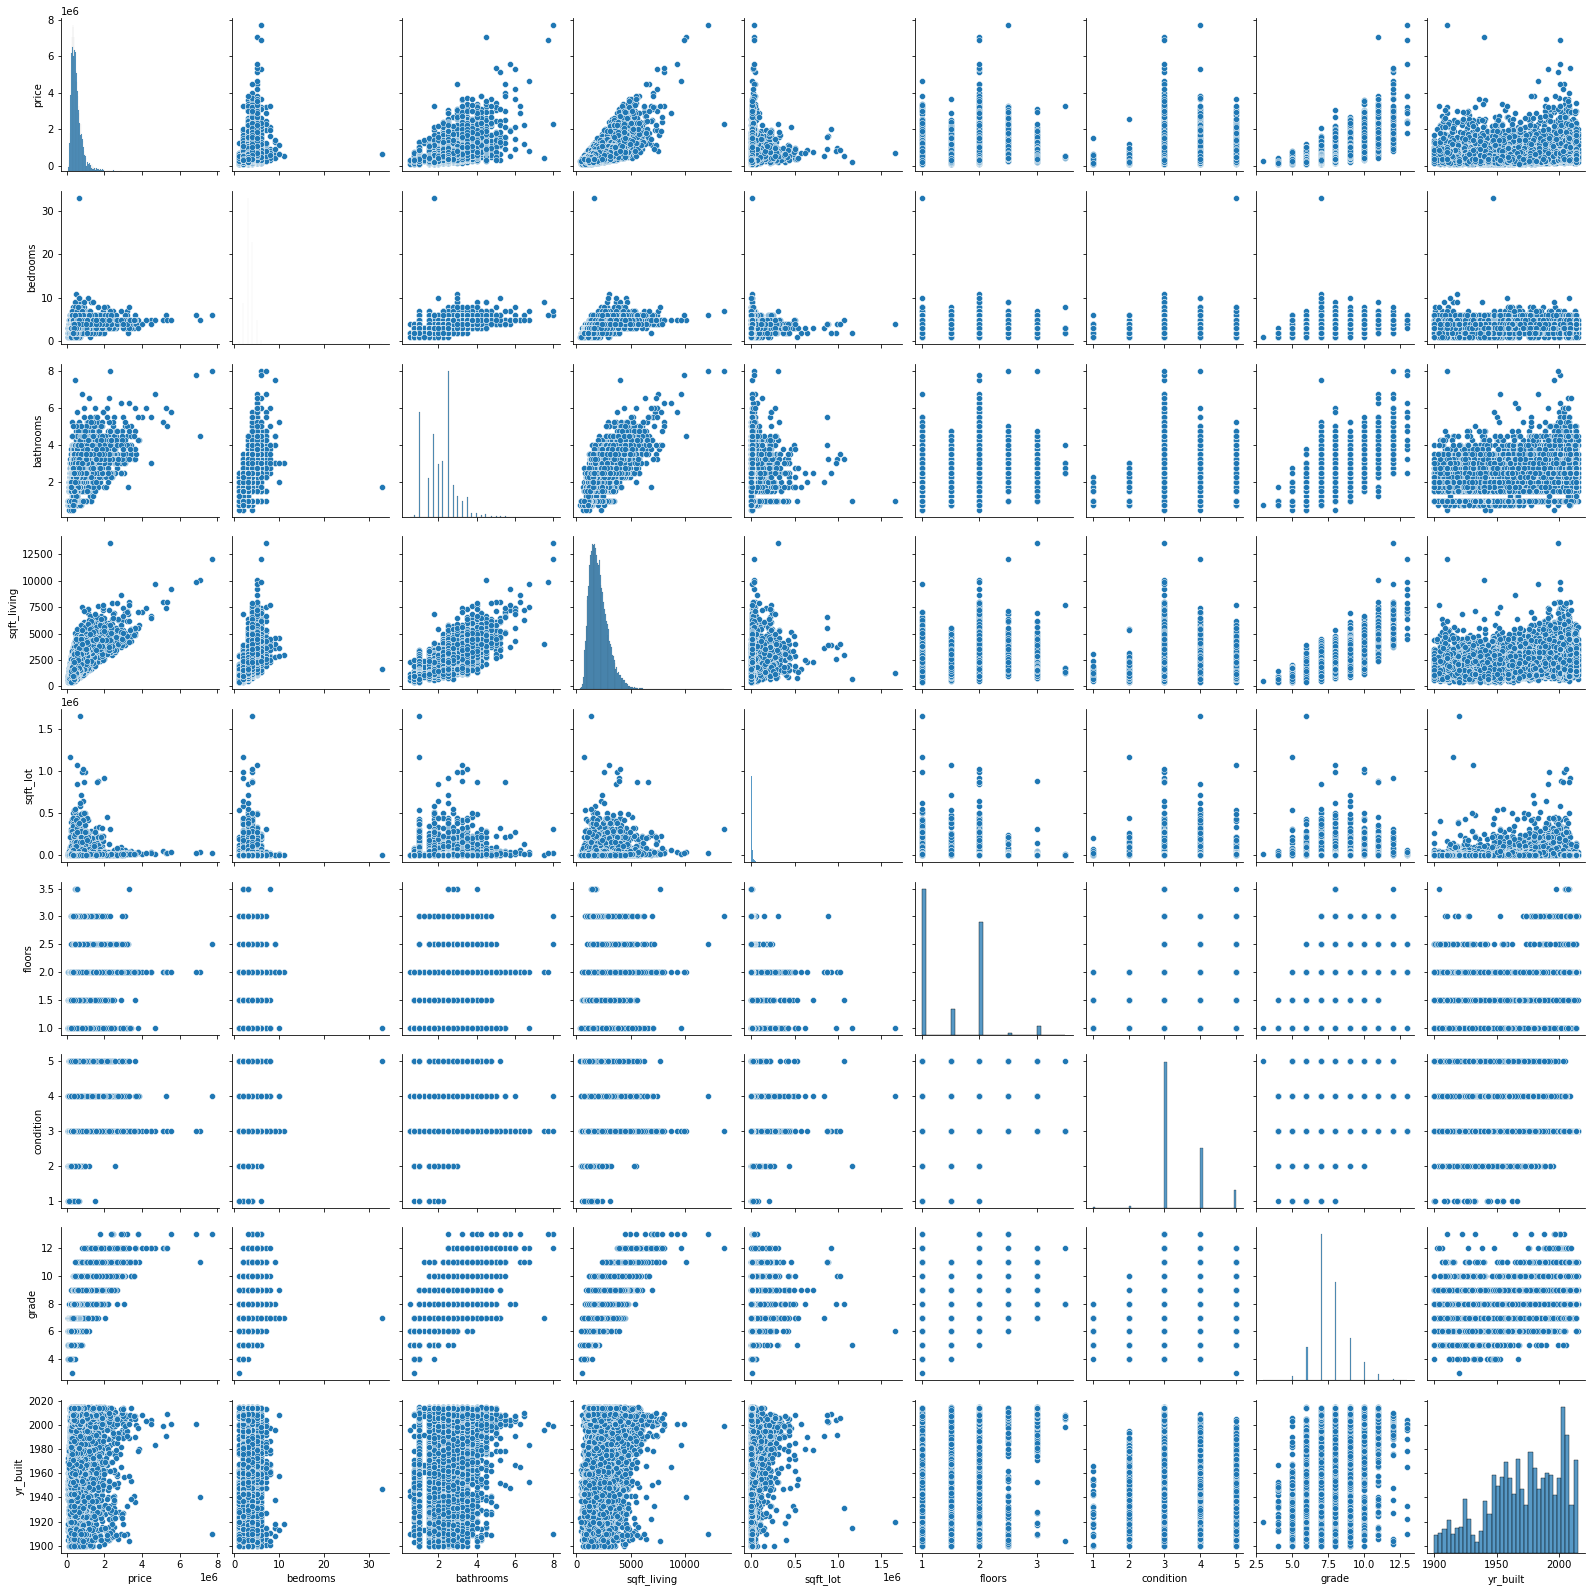

In [14]:
sns.pairplot(data=df)

## Correlation Heatmap

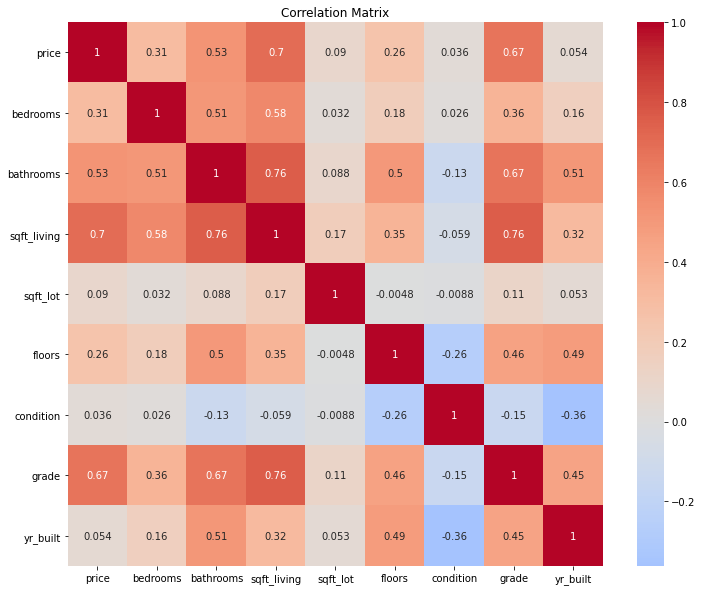

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.yticks(rotation=0) 

plt.show()

### Correlation Interpretation
We use the .corr() method to find the features correlated with "price" :

In [16]:
df.corr()["price"]

price          1.000000
bedrooms       0.308787
bathrooms      0.525906
sqft_living    0.701917
sqft_lot       0.089876
floors         0.256804
condition      0.036056
grade          0.667951
yr_built       0.053953
Name: price, dtype: float64

Based on the correlation coefficients with price from the kc housing dataset, the most important features are:

**bathrooms** - Number of bathrooms/bedrooms

 - Justification: bathrooms have a moderate positive correlation with price (0.53). This indicates that as the average number  of bathrooms per dwelling increases, the price tends to increase as well.

**grade** - overall grade given to the housing unit, based on King County grading system

 - Justification: grade has a strong positive correlation with price (0.67). This indicates that as the grade increases, the  price tends to increase as well.

**sqft_living** - square footage of the home

 - Justification: sqft_living has a strong positive correlation with price (0.7). This indicates that as the living space  squarefeet increases, the price tends to increase as well.

## Data Analysis
### Analysis 1
How does the square footage (sgft_living) of the home relate to price of the home (price)?

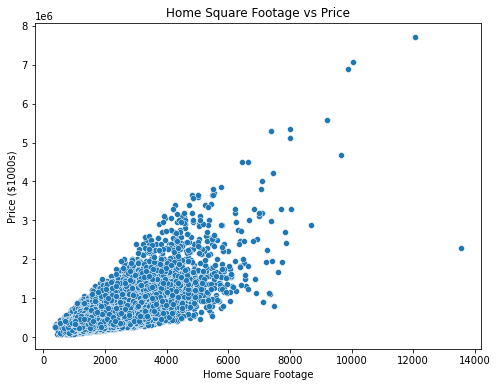

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Home Square Footage vs Price')
plt.xlabel('Home Square Footage')
plt.ylabel('Price ($1000s)')
plt.show()

**Trend Observation:**

In the scatter plot of home square footage (sgft_living) against home price (price), you can observe a positive trend. As the home square footage (sgft_living) increases, the home price (price) tends to increase as well.

**Implication:**

This suggests that houses with larger square footage, specifically between 2000 - 5000 square foot generally command higher prices in the King County housing market. Homebuyers may be willing to pay more for properties that offer more living space.

## Modelling
### Analysis 2 : Simple Linear Regression Model
The "sqft_living" feature has the highest correlation with "price" , so we will use it to build a simple linear regression model

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [19]:
# Define the formula for the simple linear regression model
simple_formula = 'price ~ sqft_living'
# Create and fit the model
simple_model = ols(simple_formula, df).fit()
# Summarize the model
simple_model_summary = simple_model.summary()
# Print the summary
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:58:06   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpreting the Simple Linear Regression Model Metrics
1. How much of the variance is explained by this model - a floating point number between 0 and 1.
2. Is the model statistically significant at a=0.05 — result is a boolean, that is, either True or False.

In [20]:
# Extract R-squared value
r_squared = simple_model.rsquared

# Determine if the model is statistically significant
model_is_significant = simple_model.f_pvalue < 0.05
r_squared, model_is_significant

(0.4926878990403508, True)

### Interpret Simple Linear Regression Model Metrics

1. **R-squared Value**
R-squared: 0.4926878990403508: This indicates that approximately 49.27% of the variance in the house prices can be explained by the living area (sqft_living). In other words, nearly half of the changes in house prices can be predicted based on the square footage of the living area. While this is a significant proportion, it also suggests that there are other factors not included in this model that explain the remaining 50.73% of the variance in house prices.

2. **Model Significance**
Model is Significant: True: The boolean value True indicates that the model is statistically significant at the alpha level of 0.05. This is determined by the p-value of the F-statistic being less than 0.05. A significant model means that there is sufficient evidence to conclude that at least one of the predictors (in this case, sqft_living) is associated with the target variable (price).

**Summary**
The simple linear regression model with sqft_living as the predictor explains approximately 49.27% of the variance in house prices. The model is statistically significant, indicating a reliable relationship between the living area and house prices. This suggests that living area is a strong predictor of house prices, but other factors should be considered to improve the model's explanatory power.

### Analysis 3: Multiple Linear Regression Model
Here, we'll build two model that contains all the features present in the dataframe (df)

#### Model 1
For the first model, we'll use the following features:
 - bedrooms
 - bathrooms
 - sqft_living
 - floors

In [21]:
# Multiple Linear Regression Model 1
multiple_formula_1 = 'price ~ bedrooms + bathrooms + sqft_living + floors'
multiple_model_1 = ols(multiple_formula_1, data=df).fit()
multiple_model_1_summary = multiple_model_1.summary()

multiple_model_1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     5550.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:58:06   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21592   BIC:                         5.996e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.587e+04   7707.527      9.843      0.000    6.08e+04     9.1e+04
bedrooms    -5.854e+04   2359.336    -24.811      0.000   -6.32e+04   -5.39e+04
bathrooms    7423.0749   3832.235      1.937      0.053     -88.389    1.49e+04
sqft_living   310.1895      3.102    100.006      0.000     304.110     316.269
floors        592.7205   3785.179      0.157      0.876   -6826.510    8011.951
==============================================================================
Omnibus:                    14420.569   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           491336.665
Skew:                           2.735   Prob(JB):                         0.00
Kurtosis:                      25.718   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Extract R-squared value
r_squared = multiple_model_1.rsquared

# Determine if the model is statistically significant
model_is_significant = multiple_model_1.f_pvalue < 0.05
r_squared, model_is_significant

(0.5069513036458112, True)

### Interpretation of Multiple Linear Regression Model 1

1. **R-squared Value**
 0.5069513036458112: This metric indicates that approximately 50.70% of the variance in house prices can be explained by the combination of the predictors: 'bedrooms', 'bathrooms', 'sqft_living', and 'floors'. This is a slight improvement compared to the simple linear regression model which explained 49.27% of the variance with just one predictor (sqft_living). This suggests that including additional features such as the number of bedrooms, bathrooms, and floors provides a better explanation for the variance in house prices.
2. **Model Significance**
True: The boolean value True indicates that the model is statistically significant at the alpha level of 0.05. This means the p-value of the F-statistic is less than 0.05, providing sufficient evidence to conclude that the predictors collectively have a statistically significant relationship with the target variable (price).
**Summary**
The multiple linear regression model with bedrooms, bathrooms, sqft_living, and floors as predictors explains approximately 50.70% of the variance in house prices. The model is statistically significant, indicating that these features together provide a meaningful explanation of the variation in house prices. This model is a better fit than the simple linear regression model, suggesting that including multiple features improves the predictive power for house prices. However, like the simple model, it also indicates that other factors not included in this model account for the remaining 49.30% of the variance.

#### Model 2
For the second model, we'll use the following features:
 - sqft_lot
 - waterfront
 - condition
 - grade
 - yr_built

Encoding the 'waterfront' feature first before building the model to avoid recursion.

In [23]:
#Encode categorical variable waterfront 
df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x == 1 else 0)

# Multiple Linear Regression Model 2
multiple_formula_2 = 'price ~ sqft_lot + waterfront + condition + grade + yr_built'
multiple_model_2 = ols(multiple_formula_2, data=df).fit()
multiple_model_2_summary = multiple_model_2.summary()

multiple_model_2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     5498.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:58:06   Log-Likelihood:            -2.9852e+05
No. Observations:               21597   AIC:                         5.971e+05
Df Residuals:                   21591   BIC:                         5.971e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.321e+06   1.31e+05     40.604      0.000    5.06e+06    5.58e+06
sqft_lot       0.0988      0.040      2.450      0.014       0.020       0.178
waterfront  8.603e+05   2.04e+04     42.263      0.000     8.2e+05       9e+05
condition   2.742e+04   2734.549     10.027      0.000    2.21e+04    3.28e+04
grade       2.444e+05   1597.823    152.983      0.000    2.41e+05    2.48e+05
yr_built   -3426.5904     67.128    -51.046      0.000   -3558.165   -3295.015
==============================================================================
Omnibus:                    19019.767   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2130932.320
Skew:                           3.749   Prob(JB):                         0.00
Kurtosis:                      51.081   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Extract R-squared value
r_squared = multiple_model_2.rsquared

# Determine if the model is statistically significant
model_is_significant = multiple_model_2.f_pvalue < 0.05
r_squared, model_is_significant

(0.5601085069041489, True)

### Interpretation of Multiple Linear Regression Model 2

1. **R-squared Value**
 0.560: The R-squared value of 0.560 indicates that 56% of the variance in house prices (price) is explained by the model, which includes the predictors 'sqft_lot', 'waterfront', 'condition', 'grade', and 'yr_built'. This means that over half of the variability in house prices can be accounted for by these five features.
2. **Model Significance**
True: The model is statistically significant because the p-value of the F-statistic is less than 0.05. This low p-value indicates that the observed relationship between the dependent variable (price) and the independent variables (sqft_lot, waterfront, condition, grade, and yr_built) is unlikely to be due to random chance. Therefore, the model provides a reliable explanation for the variance in house prices.
**Summary**
The multiple linear regression model with sqft_lot, waterfront, condition, grade, and yr_built explains approximately 56% of the variability in the house prices. The remaining 44% of the variability could be due to other factors not included in the model.The significance of the model, indicated by a p-value less than 0.05, confirms that the predictors as a whole reliably predict the dependent variable (price). This means that our model is useful and the relationships it describes are not due to random variation in the sample.

## Model Validation
### Train-Test Split
In order to get a good sense of how well the model will be doing on new instances, we'll perform a "train-test-split", that is, split the data into training and testing sets.

To perform model validation using the Train-Test split method for the two multiple linear regression models, we will follow these steps:
1. Split the Data into Training and Testing Sets.
2. Train the Models on the Training Set.
3. Evaluate the Models on the Testing Set.
4. Compare the Performance of the Models.

### Simple Linear Regression Model

In [25]:
# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Create and fit the model on the training data
simple_model = ols(simple_formula, data=train).fit()

# Predict on the test data
test['predicted_price'] = simple_model.predict(test)

# Evaluate the model
r_squared = r2_score(test['price'], test['predicted_price'])
mse = mean_squared_error(test['price'], test['predicted_price'])
mae = mean_absolute_error(test['price'], test['predicted_price'])

r_squared, mse, mae

<ipython-input-25-d521d196cc37>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_price'] = simple_model.predict(test)


(0.4933246923797949, 65977373783.61761, 170982.92465955522)

### MSE Interpretation

To add

## Multiple Linear Regression Models

#### Step 1: Split the Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

#### Step 2: Train the Models on the Training Set

In [27]:
# Model 1: Train on Training Set
multiple_formula_1 = 'price ~ bedrooms + bathrooms + sqft_living + floors'
multiple_model_1_train = ols(multiple_formula_1, data=train_df).fit()

# Model 2: Train on Training Set
multiple_formula_2 = 'price ~ sqft_lot + waterfront + condition + grade + yr_built'
multiple_model_2_train = ols(multiple_formula_2, data=train_df).fit()

#### Step 3: Evaluate the Models on the Testing Set

In [28]:
# Model 1: Predict on Testing Set
test_df['predicted_price_1'] = multiple_model_1_train.predict(test_df)

# Model 2: Predict on Testing Set
test_df['predicted_price_2'] = multiple_model_2_train.predict(test_df)

# Calculate Mean Squared Error for both models
mse_1 = mean_squared_error(test_df['price'], test_df['predicted_price_1'])
mae_1 = mean_absolute_error(test_df['price'], test_df['predicted_price_1'])
mse_2 = mean_squared_error(test_df['price'], test_df['predicted_price_2'])
mae_2 = mean_absolute_error(test_df['price'], test_df['predicted_price_2'])

mse_1, mae_1, mse_2, mae_2

<ipython-input-28-390d978f77dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_price_1'] = multiple_model_1_train.predict(test_df)
<ipython-input-28-390d978f77dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_price_2'] = multiple_model_2_train.predict(test_df)


(65340143747.883736, 168042.65405154094, 61760870462.71692, 158364.25582796664)

#### Step 4: Compare the Performance of the Models

In [29]:
# Calculate R-squared for both models on the test set
r_squared_1 = multiple_model_1_train.rsquared
r_squared_2 = multiple_model_2_train.rsquared

# Print the results
print(f"Model 1 - R-squared: {r_squared_1}, MSE: {mse_1}, MAE: {mae_1}")
print(f"Model 2 - R-squared: {r_squared_2}, MSE: {mse_2}, MAE: {mae_2}")

Model 1 - R-squared: 0.5066361263237977, MSE: 65340143747.883736, MAE: 168042.65405154094
Model 2 - R-squared: 0.5707275436498944, MSE: 61760870462.71692, MAE: 158364.25582796664


### MSE Interpretation

### Model 1
Mean Squared Error (MSE): 65,340,143,747.883736
 - This value represents the average squared difference between the actual house prices and the prices predicted by the model. A higher MSE indicates that the model has larger errors in its predictions.

### Model 2
Mean Squared Error (MSE): 61,760,870,462.71692
 - This value represents the average squared difference between the actual house prices and the prices predicted by the model. A lower MSE compared to Model 1 indicates that Model 2 has smaller errors in its predictions.

## Comparison
1. **Variance Explained:**
Model 2 has a higher R-squared value (0.5707) compared to Model 1 (0.5066), indicating that Model 2 explains more of the variance in house prices. This suggests that Model 2 provides a better fit to the data than Model 1.
2. **Prediction Errors:**
Model 2 has a lower MSE (61,760,870,462.71692) compared to Model 1 (65,340,143,747.883736), indicating that the predictions made by Model 2 are closer to the actual house prices on average. This suggests that Model 2 is more accurate in predicting house prices than Model 1.

**Overall Interpretation**
- Model 2 is a better model than Model 1 for predicting house prices in the given dataset. It explains a higher percentage of the variance in house prices and has smaller prediction errors. Therefore, considering the R-squared values and MSE, Model 2 should be preferred for predicting house prices based on the selected features (sqft_lot, waterfront, condition, grade, and yr_built).

## Conclusion

### Objective 1:
### Explore the Relationship Between Property Size and Housing Prices
**Conclusion:**

 - **Findings:** The analysis reveals a strong positive correlation (r = 0.701917) between property size (square footage of the home, sqft_living) and housing prices (prive). Larger properties tend to command higher prices in the Boston housing market.
 - **Implications:** This suggests that houses with larger square footage, specifically between 2000 - 5000 square foot generally command higher prices in the King County housing market. Homebuyers may be willing to pay more for properties that offer more living space.

### Objective 2:
### Develop a Simple Linear Regression Model
**Conclusion:**

 - **Findings:** The simple linear regression model, incorporating the feature sqft_living, achieves an R-squared (R2) score of 0.49 on the test set. This indicates that 49% of the variance in housing prices (price) can be explained by the square footage of the home predictors.
 - **Implications:** Stakeholders can utilize this model for predicting housing prices based on property square footage. It supports informed decision-making in real estate investments and pricing strategies.

### Objective 3:
### Develop a Multiple Linear Regression Model
**Conclusion:**

 - **Findings:** The multiple linear regression model 2, incorporating the features 'sqft_lot', 'waterfront', 'condition', 'grade', and 'yr_built' achieves an R-squared (R2) score of 0.57 on the test set. This indicates that 57% of the variance in housing prices (price) can be explained by these predictors.
 - **Implications:** Stakeholders can utilize this model for predicting housing prices based on property square footage. It supports informed decision-making in real estate investments and pricing strategies.

## Recommendations

To add